In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_df = pd.read_csv('Test.csv')
customer_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [ ]:
customer_df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [ ]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [ ]:
# Extract Important Columns
extract_cols = customer_df[['Gender', 'Age', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']]

In [ ]:
cust_df = extract_cols

In [ ]:
cust_df.head()

,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,36,Engineer,0.0,Low,1.0
1,Male,37,Healthcare,8.0,Average,4.0
2,Female,69,NaN,0.0,Low,1.0
3,Male,59,Executive,11.0,High,2.0
4,Female,19,Marketing,NaN,Low,4.0


In [ ]:
cust_df.isnull().sum()

,0
Gender,0
Age,0
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113


In [ ]:
cust_df['Profession'].value_counts()

,count
Profession,
Artist,802
Healthcare,418
Entertainment,301
Doctor,242
Engineer,236
Lawyer,221
Executive,176
Marketing,111
Homemaker,82


In [ ]:
cust_df['Family_Size'].value_counts()

,count
Family_Size,
2.0,768
1.0,512
3.0,455
4.0,444
5.0,200
6.0,78
7.0,26
9.0,16
8.0,15


In [ ]:
cust_df['Work_Experience'].value_counts()

,count
Work_Experience,
1.0,773
0.0,769
8.0,149
9.0,139
4.0,93
2.0,87
3.0,82
5.0,76
6.0,61


### Profession Null values fill with "Unknown"
### Work_Experience  and Family size Null values fill with median

In [ ]:
cust_df['Profession'].fillna('Unknown', inplace=True)
cust_df['Work_Experience'].fillna(cust_df['Work_Experience'].median(),inplace=True)
cust_df['Family_Size'].fillna(cust_df['Family_Size'].median(),inplace=True)


/tmp/ipython-input-2864338562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_df['Profession'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2864338562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['Profession'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2864338562.py:2: FutureWarning: A value is trying to b

In [ ]:
cust_df.isnull().sum()

,0
Gender,0
Age,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0


In [ ]:
cust_df.head()

,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,36,Engineer,0.0,Low,1.0
1,Male,37,Healthcare,8.0,Average,4.0
2,Female,69,Unknown,0.0,Low,1.0
3,Male,59,Executive,11.0,High,2.0
4,Female,19,Marketing,1.0,Low,4.0


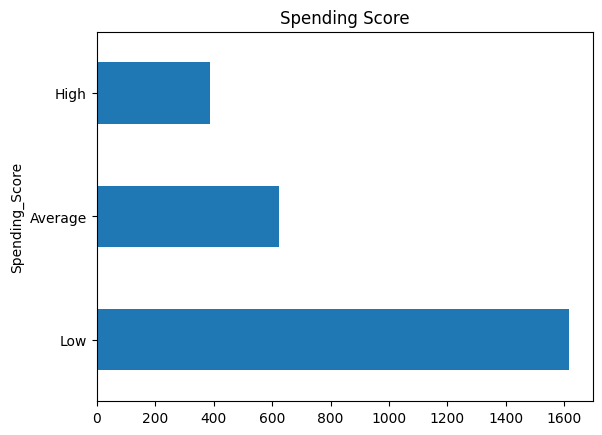

In [ ]:
# visualized graph for spending score
cust_df['Spending_Score'].value_counts().plot(kind='barh').set_title('Spending Score')
plt.show()

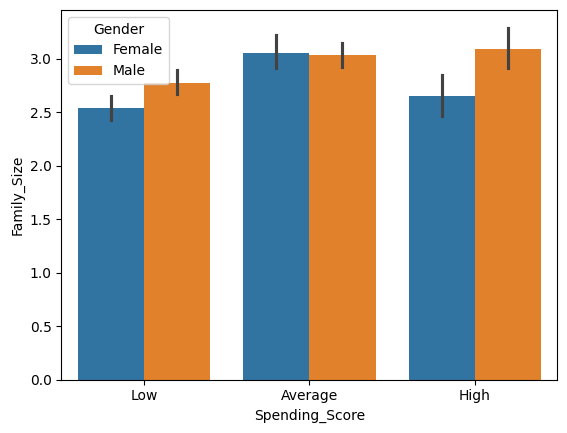

In [ ]:
sns.barplot(x='Spending_Score', y='Family_Size', data=cust_df, hue='Gender')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Creat a Pipeline and ColumnTransfomers

numeric_feature = ['Age', 'Work_Experience', 'Family_Size']
categorical_feature = ['Profession', 'Gender']
ord_feature = ['Spending_Score']

In [ ]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])


ord_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=[['Low', 'Average', 'High']]))

])

In [ ]:
preprocessing = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numeric_feature),
    ('cat_pipeline', cat_pipeline, categorical_feature),
    ('ord_pipeline', ord_pipeline, ord_feature)
])


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# The Elbow Method is used to see which cluster is fitting
wcss = []
transforms = preprocessing.fit_transform(cust_df)
for i in range(1,11):

  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  y = kmeans.fit_predict(transforms)
  wcss.append(kmeans.inertia_)

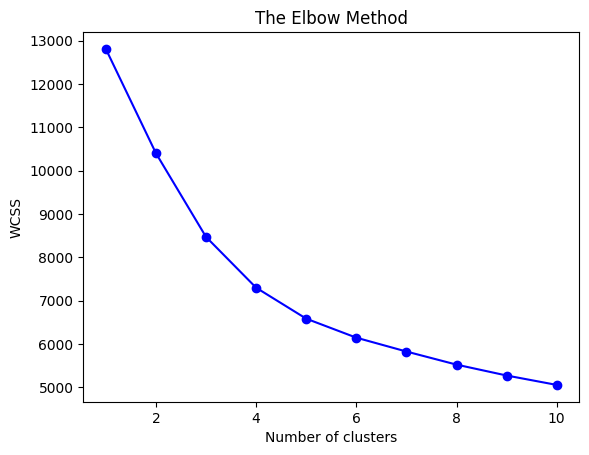

In [ ]:
# Graph Elbow Points

plt.scatter(range(1,11),wcss, color='blue')
plt.plot(range(1,11),wcss, color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
  kmeans = KMeans(n_clusters = k, random_state=42, n_init=10)
  label = kmeans.fit_predict(transforms)
  sil_coeff = silhouette_score(transforms, label)

In [ ]:
print(k,sil_coeff)

7 0.19028914993779925


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
label = kmeans.fit_predict(transforms)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(transforms)

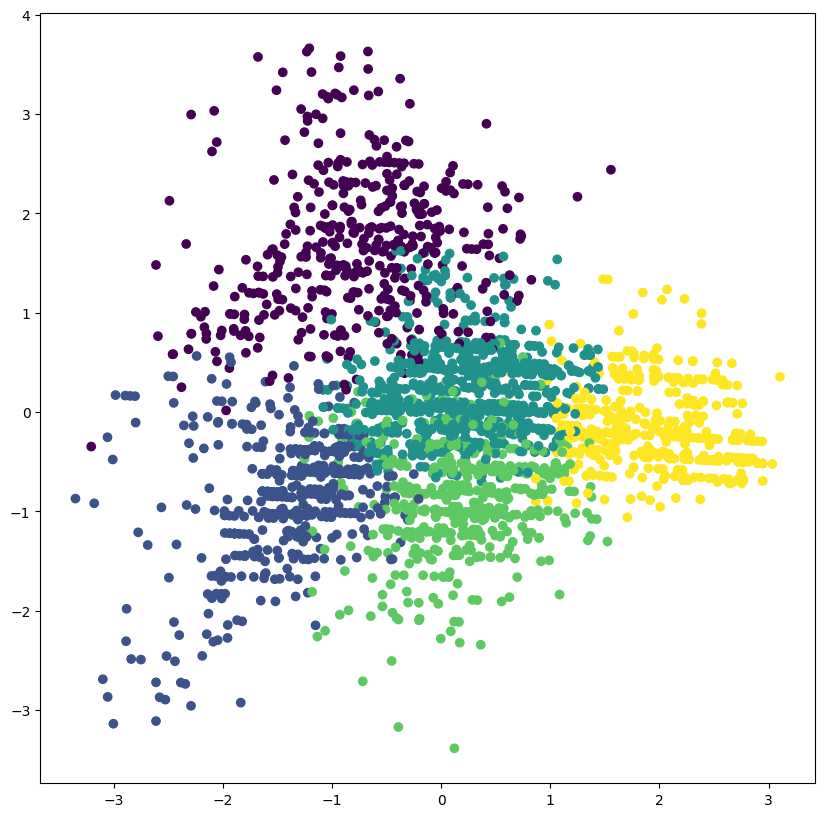

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0], x_pca[:,1], c=label)
plt.show()